# Librerias y Config Basica

In [87]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
url = [
  'https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv'
  # Las columnas son los precios de acciones de:
  # 1. MCD: Macdonals
  # 2. SBUX: Starbucks
  # 3. GOOG: Google
  # 4. AMZN: Amazon
  # 5. MSFT: Microsoft
  # 6. JPM: JPMorgan Chase & Co.
  # 7. BAC: Bank of America Corp
  # 8. C: Citigroup
  # 9. MAR: Pharma MAr
  # 10. HLT: Hoteles Hilton
  # 11. RCL: Royal Caribbean Cruises
  # 12. V: Visa Inc.
  # 13. MA: Mastercard
  # 14. PYPL: Paypal,
]

# Pandas

#### Series (una columna)

In [61]:
# CREACION: Se crea una serie en base a un rango
Numeros2 = range(50,70, 2) # inicio, fin, variacion
Numeros = [1,2,5,2,2,20,np.nan, 98, 98, 90] # inicio, fin, variacion
Indice = ['primero','segundo','tercero','cuarto','quinto','sexto','séptimo','octavo','noveno','décimo']
serie0 = pd.Series(Numeros,index=Indice) # ,index=Indice, name="hola", dtype=float
# Posibles valores
# pd.Series(
#   data = Numeros (valores)
#   index = Indice (indice)
#   name = "nombre serie" (nombre tabla)
#   dtype = float (tipo de dato)
serie0 #[2] 
# serie1= pd.Series(data=[1,2,3,4],index=['David','Juan',1,2],name='SerieX')

primero     1.0
segundo     2.0
tercero     5.0
cuarto      2.0
quinto      2.0
sexto      20.0
séptimo     NaN
octavo     98.0
noveno     98.0
décimo     90.0
dtype: float64

In [62]:
# FUNCIONES
def example(value):
  match value:
    case 0: 
        print('Indice de la serie:',serie0.index)   # imprime index
        print('Valores de la serie:',serie0.values) # imprime valores
        print('Longitud de serie:',serie0.count())  # imprime longitud (no Nan)
    case 1:
        #serie0.isna() # Verificar nulos en la serie  - devuelve un array de false y true --> 0 y 1 ---> si los sumo solo sumaria los 1
        print('Cantidad de nulos v1:',sum(serie0.isna())) # (suma de nulos = true = 1)
        print('Cantidad de nulos v2:',serie0.isnull().sum()) # (suma de nulos = true = 1)
    case 2: return serie0.value_counts() # Conteo de valores no tiene en cuenta los NaN
    case 6: return ""
    case 7: return ""
    case 11: return serie0.loc['quinto'] # Filtrar segun un indice
    case 12: return serie0.loc[['primero','quinto']] # Filtrar varios indices
    case 13: return serie0.iloc[4] # Filtrar segun posicion
    case _: return ""
example(12)

primero    1.0
quinto     2.0
dtype: float64

#### DataFrame (varias columnas)

In [63]:
# DataFrame definiendo valores
valores= [1000, 3500, 3000, 4000, 3000 , 2450]
nombres= ['David','Juan','Pedro','Lucas','Andrea','Felipe']
genero=['M','M','M','M','F','M']
df= pd.DataFrame(data={'salarios':valores, 'genero':genero}, index=nombres )
df
# pd.DataFrame(
#   data = Objeto (diccionario) de valores
#   index = Indice (indice)
#   dtype = float (tipo de dato)

,salarios,genero
David,1000,M
Juan,3500,M
Pedro,3000,M
Lucas,4000,M
Andrea,3000,F
Felipe,2450,M


In [ ]:
# DataFrame desde URL (ver clase 5)
dfURL = pd.read_csv(
  url[0],
  index_col=0, #cual columna es el indice 
  )
dfURL

##### Funciones

In [154]:
# info basica
data = df
def example(value):
  match value:
    case 0: return print(data)
    case 1: return data.head() # imprimir cabecera (los primeros elementos como muestra)
    case 1: return data.tail() # imprimir cola (los ultimos elementos como muestra)
    case 3: return data.shape # imprimir filas y columnas matriciales
    case 4: return data.size # celdas
    case 5: return data.describe() # describe los valores de la tabla, incluso se le puede dar opcioness como ".round(1)"
    case 6: return data.describe().round(1) # describe con opciones como el redondeo
    case 7: return data.T.describe().round(1) # transposiciond e datos y luego describe
    case 8: return data.groupby('column_name').operation()
    #column_name: Es la columna por la que se agruparán los datos.
    # operation(): Es una función que realiza la operación sobre los datos agrupados, como .sum(), .mean(), .count(), entre otros.
    case 9: return data.groupby('Year')[['Jan','Feb','Mar']].mean()
    # ejemplo seleccionando algunas columans
example(6)
# print("Forma matricial:", data.shape)
# print("Celdas:", data.size)

,0,1,2,3,4,5,6,7,8
count,657.0,763.0,733.0,541.0,394.0,757.0,768.0,768.0,268.0
mean,4.5,121.7,72.4,29.2,155.5,32.5,0.5,33.2,1.0
std,3.2,30.5,12.4,10.5,118.8,6.9,0.3,11.8,0.0
min,1.0,44.0,24.0,7.0,14.0,18.2,0.1,21.0,1.0
25%,2.0,99.0,64.0,22.0,76.2,27.5,0.2,24.0,1.0
50%,4.0,117.0,72.0,29.0,125.0,32.3,0.4,29.0,1.0
75%,7.0,141.0,80.0,36.0,190.0,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


In [21]:
# filtros
data = df
def example(value):
  match value:
    case 3: return data[df['genero']=='M'] # filtrado por columna
    case 4: 
      condicion = data['genero']=='F'
      return data[condicion] # otra forma de filtrado por columna
    case 5: return data.loc['David'][['salarios','genero']] # obtiene un valor segun indice y opcional: la columna/s seleccioandas
    case 6: return data.iloc[3:6] #usa datos numericos: desde el 3 hasta el 6 (6 no incluido)
    case 7: return data.loc[data.genero=="M"] 
    case 8: return data.loc[data.genero=="M", 'salarios']  #filtrado y seleccion de columna
    case _: return ""
example(6)

,salarios,genero
Lucas,4000,M
Andrea,3000,F
Felipe,2450,M


In [10]:
#extracion de datos
data = df
def example(value):
  match value:
    case 10: return data.index # devuelve los indices
    case 11: return data.columns # devuelve las cabeceras de columnas
    case 12: return data.values # devuelve los valores
    case 21: return list(data.columns) # devuelve las cabeceras de columnas y las guarda en una lista (array)
    case 22: return list(data.columns=='salarios') # devuelve lista de columnas y cual es 'GOOG'
    case 23: return data.loc[:,list(data.columns=='salarios')]
    case 24: return data['salarios']
    case 7: return ""
    case _: return data.head()
example(34)

,salarios,genero
David,1000,M
Juan,3500,M
Pedro,3000,M
Lucas,4000,M
Andrea,3000,F


### Funciones varias

In [39]:
#Otras funciones - para serios o dataFrames
data = df
def example(value):
  match value:
    case 1: return data.T # transponer
    case 2: return data.isnull() # cuales son nulos
    case 3: return data.fillna(0) # reemplaza los na por un valor
    case 4: return data.dropna() # BORRA TODA LA FILA donde hay algun Nan (ojo)
    case 5: return data.replace(1000, 5) # reemplaza un valor x otro
    case 6: return ""
    case _: return data.head()
example(2)

,salarios,genero
David,False,False
Juan,False,False
Pedro,False,False
Lucas,False,False
Andrea,False,False
Felipe,False,False


# Numpy

In [40]:
#NArray(array con propiedades)
import numpy as np
npr = np.array(range(10)) # array con rango
npr2 = np.arange(10) # array con rango (de numpy)
npz = np.zeros(10) # array de 0
np1 = np.ones(10) # array de 1
npf = np.full(5,"a") # array de un valor especifico como 1 o "a" o un array
npa = np.random.randint(10, size=(3,4)) # size = shape
# propiedades:
#  dtype asigna un tipo de dato en especifico
#  size = shape (dimensiones)
# TRUCO: lAS DIMENSIONES SE SUELEN VER POR LA CANTIDAD DE [] QUE TIENE

# npr
# npr2
# npz
# np1
# npf
npa


array([[3, 1, 9, 3],
       [4, 6, 9, 0],
       [0, 4, 9, 5]], dtype=int32)

Tipos de datos en numpy
* i : integer -
* b : boolean
* u : unsigned integer
* f : float
* c : complex float
* m : timedelta
* M : datetime
* O : object
* S : string
* U : unicode string
* V : fixed chunk of memory for other type ( void )

In [22]:
# PROPIEDADES
inta = np.array([1,2,3,4])
stra = np.array(['apple', 'banana', 'cherry'])
def example(value):
  match value:
    case 0: return print(
      "array:", inta,"\n", 
      "tipo de dato inta:", inta.dtype,"\n",#tipo de dato
      "tamaño bytes inta:", inta.itemsize,"\n",# tamaño bytes x item
      "tamaño bytes inta:", inta.nbytes,"\n",# tamaño bytes total
      "tipo de dato stra:", stra.dtype,"\n", #tipo de dato
      "dimensiones:", inta.ndim,"\n",  # dimensiones x = 1d, xy = 2d, xyz = 3d
      "forma:", inta.shape,"\n", # forma matricial
      "elementos:", inta.size,"\n",  # cant elementos
      "cambiar tipo de dato inta:", inta.astype('U') #cambia tipo de dato
      ) 
    case _: return ""
example(0)

array: [1 2 3 4] 
 tipo de dato inta: int64 
 tamaño bytes inta: 8 
 tamaño bytes inta: 32 
 tipo de dato stra: <U6 
 dimensiones: 1 
 forma: (4,) 
 elementos: 4 
 cambiar tipo de dato inta: ['1' '2' '3' '4']


In [37]:
# ACCESO
inta = np.array([1,2,3,4,5,3,2,1,0,3,8,5,3])
stra = np.array(['apple', 'banana', 'cherry'])
def example(value):
  match value:
    case 0: return inta[2] # x posicion
    case 1: return print( # varias opciones
      "inta:", inta,"\n",
      "X posicion:", inta[2],"\n",
      "X posicion inversa:", inta[-3],"\n",
      "X rango:", inta[2:5],"\n",
      "X rango inverso:", inta[-5:-2],"\n",
      "X varios elementos:", inta[[2, 3, 7]],"\n",
      "X rango c salto:", inta[2:8:2],"\n",
      "[1:5:2] --> Desde : Hasta(pero no incluye) : salto","\n","\n",
      "X rango:", inta[2:],"\n",
      "X rango:", inta[:5],"\n",
      "X rango:", inta[::3],"\n",
      "X rango:", inta[::-3],"\n",
      "Ejemplo 2d = [2:1 , 3:3]"
    )
    case _: return ""
example(1)

inta: [1 2 3 4 5 3 2 1 0 3 8 5 3] 
 X posicion: 3 
 X posicion inversa: 8 
 X rango: [3 4 5] 
 X rango inverso: [0 3 8] 
 X varios elementos: [3 4 1] 
 X rango c salto: [3 5 2] 
 [1:5:2] --> Desde : Hasta(pero no incluye) : salto 
 
 X rango: [3 4 5 3 2 1 0 3 8 5 3] 
 X rango: [1 2 3 4 5] 
 X rango: [1 4 2 3 3] 
 X rango: [3 3 2 4 1] 



In [55]:
# BASIC OPERATION - RESHAPE
intaj = np.arange(1,65)
intaj2 = intaj.reshape(8,8)

print( # SHAPE
  "intaj:", intaj,"\n",
  "Size:", intaj.size,"\n",
  "Shape:", intaj.shape,"\n",
  "Reshape:", intaj2,"\n",
  "Shape:", intaj2.shape,"\n",
)

intaj: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64] 
 Size: 64 
 Shape: (64,) 
 Reshape: [[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]
 [25 26 27 28 29 30 31 32]
 [33 34 35 36 37 38 39 40]
 [41 42 43 44 45 46 47 48]
 [49 50 51 52 53 54 55 56]
 [57 58 59 60 61 62 63 64]] 
 Shape: (8, 8) 



In [ ]:
# BASIC OPERATION CONCAT
ay1 = np.array([[1],
                [2],
                [3]])
ay2 = np.array([[4],
                [5],
                [6]])
ax1 = np.array([[11,12,13]])
ax2 = np.array([[14,15,16]])

def example(value):
  match value:
    case 2: return ay1 # CONCAT
    case 3: return np.concatenate((ax1, ax2)) # CONCAT
    case 4: return np.vstack((ax1, ax2)) # apila vertical = hacia abajo
    case 5: return np.hstack((ay1, ay2)) # apila horizontal = de costado
example(5)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [57]:
# BASIC OPERATION SPLIT - Dividir
ar1 = np.array([0,1,2,3,4,5,6,7,8])
ar2 = np.array([[14,15,16]])

def example(value):
  match value:
    case 1: return np.split(ar1,[3]) #se indica posicion de corte
    case 2: return np.split(ar1,[3,7]) #se indica 2 posiciones de corte
    case _: return ""
example(2)
# para 2 dimensiones:
# hsplit funciona de manera similar pero corta vertical   (6,4) = (6,2)(6,2) -> (v,h)
# vsplit funciona de manera similar pero corta horizontal (6,4) = (3,4)(3,4) -> (v,h)
# newarray1, newarray2 = np.split(ar1,[3]) 

[array([0, 1, 2]), array([3, 4, 5, 6]), array([7, 8])]

In [59]:
# FUN AGREGACION
inta = np.array([1,2,3,4,5,3,2,1,0,3,8,5,3])

print( # varias opciones
  "inta   :", inta,"\n",
  "sum    :", inta.sum(),"\n",
  "pro    :", inta.mean(),"\n",
  "max    :", inta.max(),"\n",
  "min    :", inta.min(),"\n",
  "median :", np.median(inta),"\n",
  "des est:", np.std(inta),"\n",
  "varianz:", np.var(inta),"\n",
)

inta   : [1 2 3 4 5 3 2 1 0 3 8 5 3] 
 sum    : 40 
 pro    : 3.076923076923077 
 max    : 8 
 min    : 0 
 median : 3.0 
 des est: 2.0176733920929237 
 varianz: 4.071005917159765 



In [60]:
# FUNCIONES VECTORIALES .. consultar segun necesidad pero hay de todo

# Analisis Exploratorio (como trabajar)

1 - Buscar info de que es cada dato (glosario o proguntar), como se comporta y que valores puede tomar, si hay nulos y que hacer si los encontraran y no hubiera.

2 - Analisar estructura (head) y tipos de datos. - la fila header se define despues

3 - buscar info basica: indice y size, na, max, min, median, pro.

4 - revisar si los nulos figiran como error o ceros

#### CASO 0 - remover filas con nulos

In [97]:
# CASO0 - remover nulos
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df0= pd.read_csv(url,sep=',', header=None)
df0 = df0.replace(0, np.nan)
df0.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [98]:
# CASO 0 - remoción de nulos
df0.dropna(inplace=True)
df0.shape #si se mira el resultado final se bservara que elimino demasiado

(111, 9)

#### CASO 1 - reemplazo de nulos - v1

In [84]:
# CASO1 - reemplazar nulos por ... Parte Analis
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df= pd.read_csv(url,sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
# CASO1 - reemplazar nulos por ... Parte ceros por NaN
df2 = df.replace(0, np.nan)
df2.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [83]:
# CASO1 - reemplazar nulos por ... Parte Nan por Median
median = df2.mean()
df2.fillna(median, inplace=True)
#median
df2.head()

,0,1,2,3,4,5,6,7,8
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1.0
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,1.0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1.0
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,1.0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1.0


#### CASO 2 - reemplazo de nulos - v2

Esta libreria sirve para prepocesar y reemplazar valores perdidos

In [103]:
# CASO2 - reemplazar nulos por ... Parte Analis
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
case2 = pd.read_csv(url,sep=',', header=None)
case2 = case2.replace(0, np.nan)
case2.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [105]:
# 1. Crear un numpy array con los valores
valores = case2.values

# 2. Definir el imputador
imputador = SimpleImputer(missing_values=np.nan, strategy='mean')

# 3. transformar el dataset
transformados = imputador.fit_transform(valores)

# 5. Transformar array en DataFrame 
transformados=pd.DataFrame(transformados)
#transformados= transformados.
print(transformados.head().round(2))


      0      1     2      3       4     5     6     7    8
0  6.00  148.0  72.0  35.00  155.55  33.6  0.63  50.0  1.0
1  1.00   85.0  66.0  29.00  155.55  26.6  0.35  31.0  1.0
2  8.00  183.0  64.0  29.15  155.55  23.3  0.67  32.0  1.0
3  1.00   89.0  66.0  23.00   94.00  28.1  0.17  21.0  1.0
4  4.49  137.0  40.0  35.00  168.00  43.1  2.29  33.0  1.0


In [113]:
# VERSION CHATGP de SimpleImputer
# 1. Crear un numpy array con los valores
case3 = case2
case3 = case3.rename(columns={0: "NEMB", 1: "GLU", 2: "PART",3:"GROS",4:"HUR",5:"BMI",6:"FPRED",7:"AGE",8:"CLASS"})

# 2. Definir el imputador
imputador = SimpleImputer(missing_values=np.nan, strategy='mean')
# strategyas adicionales: 'most_frequent', 'median', 'constant' para el ultimo se debe añadir: `fill_value`

# 3. transformar el dataset (solo columnas necesarias)
case3[['GROS','HUR']] = imputador.fit_transform(case3[['GROS','HUR']])
case3.head()


,NEMB,GLU,PART,GROS,HUR,BMI,FPRED,AGE,CLASS
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31,NaN
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1.0


### GRAFICACION FALTANTES

<Axes: >

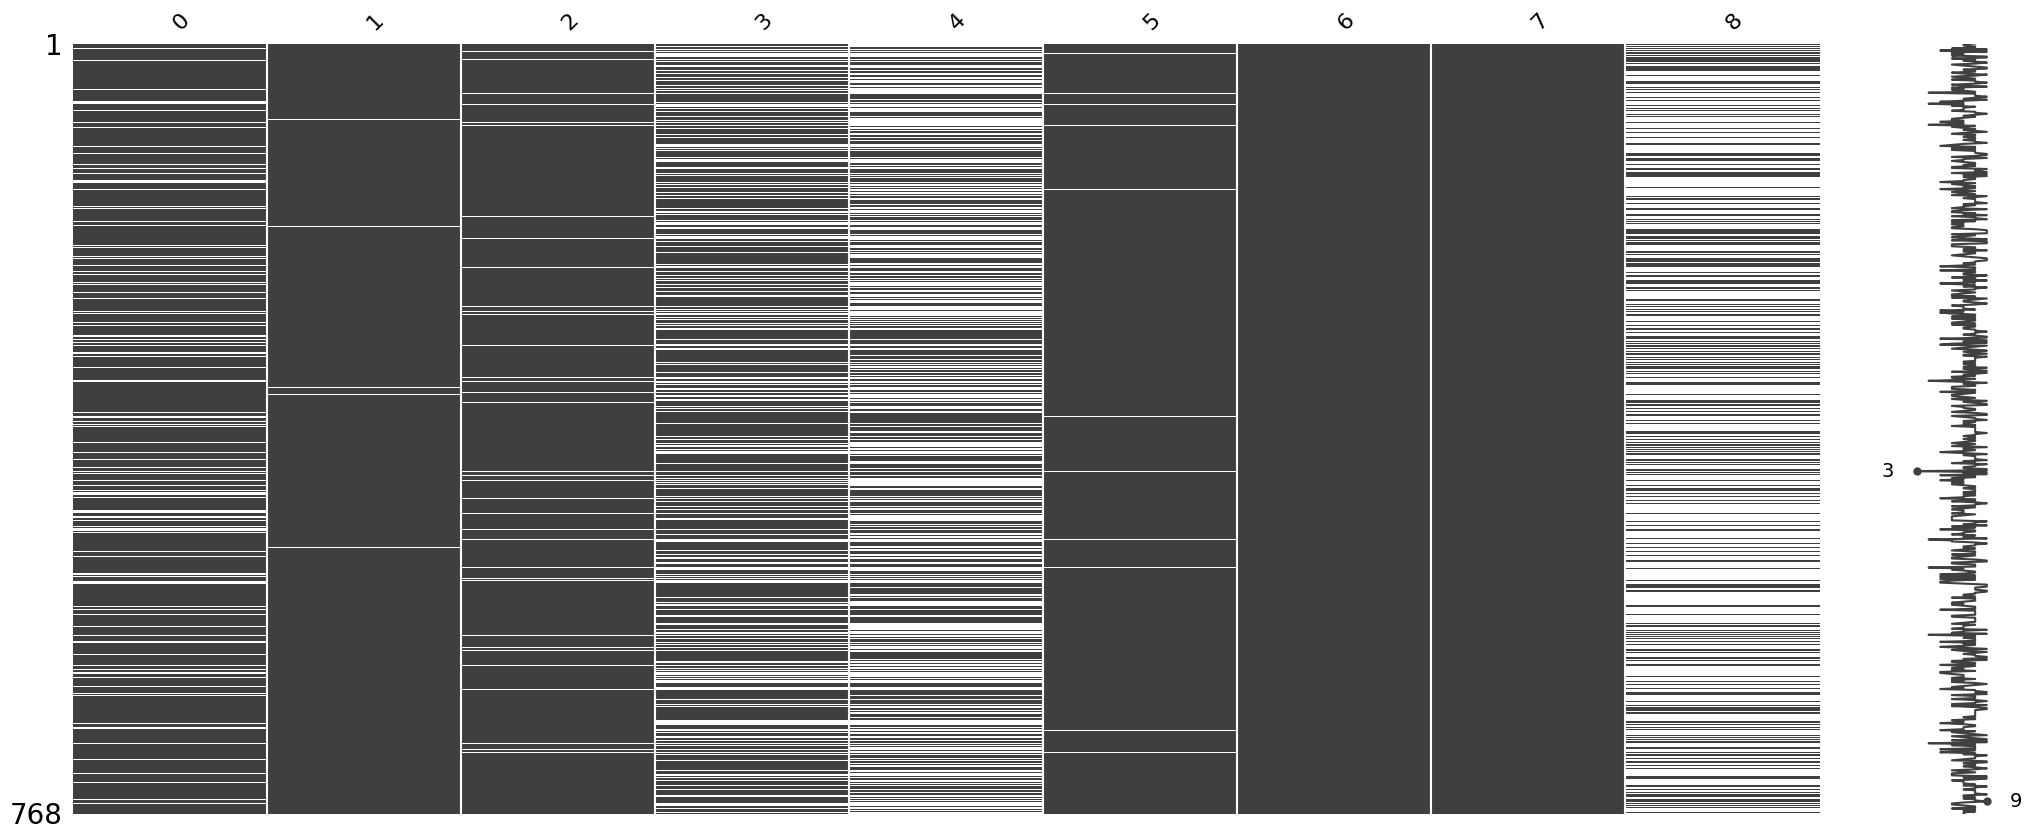

In [117]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df= pd.read_csv(url,sep=',', header=None)
df=df.replace(0, np.nan)

import missingno as msno
%matplotlib inline
msno.matrix(df)

### AGRUPACIONES

#### Ejemplo lluvias (group by y describe)

In [167]:
# leer un csv
df_lluvias_archivo = pd.read_csv('./Datos/lluvias_1965_to_2002.csv')
df_lluvias_archivo.head()
#df_lluvias_archivo.tail()
# df_lluvias_archivo.info()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [157]:
#descomponer sus valores para luego armar los datos
indice = list(df_lluvias_archivo.Year) # todos los años
columnas = df_lluvias_archivo.columns[1:] # columas = meses
valores = df_lluvias_archivo.values[:,1:] # datos exepyo la primera columna
df_lluvias = pd.DataFrame(valores,index=indice,columns=columnas)
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [144]:
#comparacion de datos
xmes = df_lluvias.sum() # total x cada mes
promxaño = df_lluvias.mean(axis='columns')
xaño = df_lluvias.sum(axis='columns')
print(
  xmes.sum(),"\n",xaño.sum()
)

52833.638999999996 
 52833.63899999999


In [161]:
#desscripcion de resultados
df_lluvias.describe().round(1)
#df_lluvias.T.describe().round(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
mean,0.3,1.1,1.7,12.4,25.1,337.1,430.0,277.1,201.1,73.2,25.2,6.1
std,0.6,1.7,2.5,13.7,22.5,171.7,178.0,132.2,123.7,62.9,31.8,11.7
min,0.0,0.0,0.0,0.1,0.5,94.1,84.9,59.4,44.6,1.1,0.3,0.0
25%,0.0,0.0,0.0,2.3,7.0,226.2,322.5,183.2,105.9,22.0,3.7,0.0
50%,0.0,0.2,0.6,5.5,18.1,312.1,415.1,243.2,181.0,49.8,14.7,0.5
75%,0.2,1.9,2.1,19.8,33.1,412.6,555.3,401.2,242.4,115.7,37.0,4.2
max,3.0,8.4,9.6,53.3,80.5,773.7,780.0,541.6,613.5,225.9,122.8,37.7


In [175]:
# Metodo grouby
# Sintaxis básica: df.groupby('column_name').operation()
# Se puede agrupar por mas de una columna
df_lluvias_archivo.groupby('Year')[['Jan','Feb','Mar']].mean()

,Jan,Feb,Mar
Year,,,
1965,0.029,0.069,0.000
1966,0.905,0.000,0.000
1967,0.248,3.390,1.320
1968,0.318,3.035,1.704
1969,0.248,2.524,0.334
1970,0.070,0.000,0.001
1971,0.000,0.000,0.000
1972,0.000,0.029,0.000
1973,0.000,2.969,0.234


#### Ejemplo Presidentes (trabajo con texto)


In [176]:
#cargar archivo
Presidentes_archivo = pd.read_csv('./Datos/us_presidents 2.csv')
Presidentes_nombres = pd.Series(Presidentes_archivo['president'])
Presidentes_nombres.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [179]:
# operaciones con columna (mayus(upper), minus(lower), largue (len), split) + que compiencen x
Presidentes_nombres.str.upper() # convierte a mayusculas
Presidentes_nombres.str.lower() # convierte a minusculas
Presidentes_nombres.str.len()   # largo de exto
Presidentes_nombres.str.split() # separar columnas
Presidentes_nombres[Presidentes_nombres.str.startswith(pat='J') ] #filtro que comienzen por J

1            John Adams
3         James Madison
4          James Monroe
5     John Quincy Adams
9            John Tyler
10        James K. Polk
14       James Buchanan
19    James A. Garfield
34      John F. Kennedy
38         Jimmy Carter
Name: president, dtype: object

In [185]:
# que no continen
import re
Presidentes_nombres[~Presidentes_nombres.str.contains(pat='John |George | Calvin', regex=True)]# si se pone True, se asume que es una regular expression
#

2           Thomas Jefferson
3              James Madison
4               James Monroe
6             Andrew Jackson
7           Martin Van Buren
8     William Henry Harrison
10             James K. Polk
11            Zachary Taylor
12          Millard Fillmore
13           Franklin Pierce
14            James Buchanan
15           Abraham Lincoln
16            Andrew Johnson
17          Ulysses S. Grant
18       Rutherford B. Hayes
19         James A. Garfield
20         Chester A. Arthur
21          Grover Cleveland
22         Benjamin Harrison
23          Grover Cleveland
24          William McKinley
25        Theodore Roosevelt
26       William Howard Taft
27            Woodrow Wilson
28         Warren G. Harding
29           Calvin Coolidge
30            Herbert Hoover
31     Franklin D. Roosevelt
32           Harry S. Truman
33      Dwight D. Eisenhower
35         Lyndon B. Johnson
36             Richard Nixon
37               Gerald Ford
38              Jimmy Carter
39            

In [189]:
# reemplazo (replace)
Presidentes_nombres.str.replace(pat='George ',repl='<><>',).head()

0      <><>Washington
1          John Adams
2    Thomas Jefferson
3       James Madison
4        James Monroe
Name: president, dtype: object

#### Series tiempo (trabajo con tiempo)


* ***Time stamp*** o marca de tiempo: representan un punto en el tiempo. Por ejemplo, fecha y hora.
* ***Período***: representan un intervalo de tiempo. Por ejemplo, los minutos transcurridos desde que comenzó la clase hasta ahora.
* ***Duración***: representa una duración medida en tiempo, pero independientemente del momento en que sucede. Por ejemplo, 15 minutos.


In [194]:
# fecha = pd.to_datetime('03/01/2020',dayfirst=True)
fecha = pd.to_datetime('14/06/1986 07:05',dayfirst=True)
fecha

Timestamp('1986-06-14 07:05:00')